# Introduction

This analysis report consists of an analytical task from an international online store. The purpose of the test is to detect changes related to the introduction of an improved recommendation system to the users on the website.

We are supposed to get the results as follows:

Within 14 days of signing up, users will show better conversion into product page views (the product_page event), instances of adding items to the shopping cart (product_cart), and purchases (purchase). At each stage of the funnel product_page → product_cart → purchase, there will be at least a 10% increase and the expected number of test participants are 6000.

In this analysis, I've done the data pre processing, exploratorydata analysis to study conversion at different stages of the funnel, check whether number of events per user are distributed equally among the samples? , Are there users who are present in both samples?, How is the number of events distributed among days?, Are there any peculiarities in the data that you have to take into account before starting the A/B test? etc. 

I winded off by evaluating the A/B test results by using a z-test to check the statistical difference between the proportions and gave my final conclusion and few recommendations.

# Table of contents

<div id="toc" class="toc"><ul class="toc-item"><li><span class="highlight_on_scroll"><i class="fa fa-fw"></i><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span class=""><i class="fa fa-fw fa-caret-down"></i><a href="#Table-of-contents" data-toc-modified-id="Table-of-contents-2" class="toc-item-highlight-select"><span class="toc-item-num">2&nbsp;&nbsp;</span>Table of contents</a></span><ul class="toc-item"><li><span class=""><i class="fa fa-fw fa-caret-down"></i><a href="#Downloading-the-data-and-Pre-processing-it" data-toc-modified-id="Downloading-the-data-and-Pre-processing-it-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Downloading the data and Pre-processing it</a></span><ul class="toc-item"><li><span><i class="fa fa-fw"></i><a href="#Conclusion-:" data-toc-modified-id="Conclusion-:-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Conclusion :</a></span></li></ul></li><li><span><i class="fa fa-fw fa-caret-down"></i><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><span><i class="fa fa-fw"></i><a href="#Finding-out-number-of-unique-users-in-each-ab_test" data-toc-modified-id="Finding-out-number-of-unique-users-in-each-ab_test-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Finding out number of unique users in each ab_test</a></span></li><li><span><i class="fa fa-fw"></i><a href="#Studying-total-users-in-each-group-per-ab_test" data-toc-modified-id="Studying-total-users-in-each-group-per-ab_test-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Studying total users in each group per ab_test</a></span></li><li><span><i class="fa fa-fw"></i><a href="#Study-conversion-at-different-stages-of-the-funnel." data-toc-modified-id="Study-conversion-at-different-stages-of-the-funnel.-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Study conversion at different stages of the funnel.</a></span></li><li><span><i class="fa fa-fw"></i><a href="#Is-the-number-of-events-per-user-distributed-equally-among-the-samples?" data-toc-modified-id="Is-the-number-of-events-per-user-distributed-equally-among-the-samples?-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Is the number of events per user distributed equally among the samples?</a></span></li><li><span><i class="fa fa-fw"></i><a href="#Checking-if-the-condition-15%-of-the-new-users-from-the-EU-region-is-satisfied" data-toc-modified-id="Checking-if-the-condition-15%-of-the-new-users-from-the-EU-region-is-satisfied-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>Checking if the condition 15% of the new users from the EU region is satisfied</a></span></li><li><span><i class="fa fa-fw"></i><a href="#Are-there-any-peculiarities-in-the-data-that-you-have-to-take-into-account-before-starting-the-A/B-test?" data-toc-modified-id="Are-there-any-peculiarities-in-the-data-that-you-have-to-take-into-account-before-starting-the-A/B-test?-2.2.6"><span class="toc-item-num">2.2.6&nbsp;&nbsp;</span>Are there any peculiarities in the data that you have to take into account before starting the A/B test?</a></span></li><li><span><i class="fa fa-fw"></i><a href="#Calculating-cummulative-revenue-for-the-groups-A-&amp;-B-for-the-interface_test" data-toc-modified-id="Calculating-cummulative-revenue-for-the-groups-A-&amp;-B-for-the-interface_test-2.2.7"><span class="toc-item-num">2.2.7&nbsp;&nbsp;</span>Calculating cummulative revenue for the groups A &amp; B for the interface_test</a></span></li><li><span><i class="fa fa-fw"></i><a href="#Checking-whether-users-are-split-equally-in-both-the-groups" data-toc-modified-id="Checking-whether-users-are-split-equally-in-both-the-groups-2.2.8"><span class="toc-item-num">2.2.8&nbsp;&nbsp;</span>Checking whether users are split equally in both the groups</a></span></li><li><span><i class="fa fa-fw fa-caret-down"></i><a href="#Use-a-z-test-to-check-the-statistical-difference-between-the-proportions." data-toc-modified-id="Use-a-z-test-to-check-the-statistical-difference-between-the-proportions.-2.2.9"><span class="toc-item-num">2.2.9&nbsp;&nbsp;</span>Use a z-test to check the statistical difference between the proportions.</a></span><ul class="toc-item"><li><span><i class="fa fa-fw"></i><a href="#Formulating-Hypothesis" data-toc-modified-id="Formulating-Hypothesis-2.2.9.1"><span class="toc-item-num">2.2.9.1&nbsp;&nbsp;</span>Formulating Hypothesis</a></span></li></ul></li></ul></li></ul></li><li><span><i class="fa fa-fw"></i><a href="#Overall-conclusion-and-recommendations" data-toc-modified-id="Overall-conclusion-and-recommendations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Overall conclusion and recommendations</a></span></li></ul></div>

## Downloading the data and Pre-processing it

In [2]:
# to install  plotly module
!pip install plotly==4.4.1 --trusted-host pypi.org --trusted-host files.pythonhosted.org

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.3 MB 1.6 MB/s eta 0:00:01


In [3]:
# importing all required libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import scipy.stats as stats
from scipy.stats import norm
from math import factorial
import seaborn as sns
import warnings
from datetime import date, timedelta
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import math as mth
from plotly import graph_objects as go

In [4]:
# importing the data file and turning it into a readable dataframe
final_ab_events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
final_ab_events.head(10)

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99
6,6B2F726BFD5F8220,2020-12-07 11:27:42,purchase,4.99
7,BEB37715AACF53B0,2020-12-07 04:26:15,purchase,4.99
8,B5FA27F582227197,2020-12-07 01:46:37,purchase,4.99
9,A92195E3CFB83DBD,2020-12-07 00:32:07,purchase,4.99


In [5]:
# checking the general information of the data
final_ab_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
user_id       423761 non-null object
event_dt      423761 non-null object
event_name    423761 non-null object
details       60314 non-null float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [6]:
# changing the datetime info from object datatype to datetime datatype and event_name to category type to optimise the data
final_ab_events['event_dt'] = final_ab_events['event_dt'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
final_ab_events['event_name'] = final_ab_events['event_name'].astype('category')


In [7]:
# checking for any missing values in the dataset
final_ab_events.isna().sum()

user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

In [8]:
# checking for any duplicated values in the dataset
final_ab_events.duplicated().sum()

0

In [9]:
# checking the number of unique events
final_ab_events.event_name.value_counts()

login           182465
product_page    120862
purchase         60314
product_cart     60120
Name: event_name, dtype: int64

In [10]:
# checking the number of unique details
final_ab_events.details.value_counts()

4.99      44579
9.99       9158
99.99      5405
499.99     1172
Name: details, dtype: int64

In [11]:
# importing the data file and turning it into a readable dataframe
final_ab_new_users = pd.read_csv('/datasets/final_ab_new_users.csv')
final_ab_new_users.head(10)

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
5,137119F5A9E69421,2020-12-07,N.America,iPhone
6,62F0C741CC42D0CC,2020-12-07,APAC,iPhone
7,8942E64218C9A1ED,2020-12-07,EU,PC
8,499AFACF904BBAE3,2020-12-07,N.America,iPhone
9,FFCEA1179C253104,2020-12-07,EU,Android


In [12]:
# checking the general information of the data
final_ab_new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
user_id       61733 non-null object
first_date    61733 non-null object
region        61733 non-null object
device        61733 non-null object
dtypes: object(4)
memory usage: 1.9+ MB


In [13]:
# changing the datetime info from object datatype to datetime datatype and region,device to category type to optimise the data
final_ab_new_users['first_date'] = final_ab_new_users['first_date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
final_ab_new_users['region'] =  final_ab_new_users['region'].astype('category')
final_ab_new_users['device'] =  final_ab_new_users['device'].astype('category')

final_ab_new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
user_id       61733 non-null object
first_date    61733 non-null datetime64[ns]
region        61733 non-null category
device        61733 non-null category
dtypes: category(2), datetime64[ns](1), object(1)
memory usage: 1.1+ MB


In [14]:
# checking for any missing values in the dataset
final_ab_new_users.isna().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

In [15]:
# checking for any duplicated values in the dataset
final_ab_new_users.duplicated().sum()

0

In [16]:
# checking the number of unique regions
final_ab_new_users.region.value_counts()

EU           46270
N.America     9155
CIS           3155
APAC          3153
Name: region, dtype: int64

In [17]:
# checking the number of unique devices
final_ab_new_users.device.value_counts()

Android    27520
PC         15599
iPhone     12530
Mac         6084
Name: device, dtype: int64

In [18]:
# checking for any duplicated values in the dataset
final_ab_new_users.duplicated().sum()

0

In [19]:
# importing the data file and turning it into a readable dataframe
ab_project_marketing_events = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
ab_project_marketing_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [20]:
# checking the general information of the data
ab_project_marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
name         14 non-null object
regions      14 non-null object
start_dt     14 non-null object
finish_dt    14 non-null object
dtypes: object(4)
memory usage: 576.0+ bytes


In [21]:
# changing the datetime info from object datatype to datetime datatype to optimise the data
ab_project_marketing_events['start_dt'] = ab_project_marketing_events['start_dt'].map(
                                                                                lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
ab_project_marketing_events['finish_dt'] = ab_project_marketing_events['finish_dt'].map(
                                                                                lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

ab_project_marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
name         14 non-null object
regions      14 non-null object
start_dt     14 non-null datetime64[ns]
finish_dt    14 non-null datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


In [22]:
# checking for any missing values in the dataset
ab_project_marketing_events.isna().sum()

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

In [23]:
# checking for number of unique regions
ab_project_marketing_events.regions.value_counts()

APAC                        4
EU, CIS, APAC, N.America    3
CIS                         2
EU, CIS, APAC               2
EU, N.America               2
N.America                   1
Name: regions, dtype: int64

In [24]:
# checking for any duplicated values in the dataset
ab_project_marketing_events.duplicated().sum()

0

In [25]:
# importing the data file and turning it into a readable dataframe
final_ab_participants = pd.read_csv('/datasets/final_ab_participants.csv')
final_ab_participants.head(10)

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test
5,4FF2998A348C484F,A,recommender_system_test
6,7473E0943673C09E,A,recommender_system_test
7,C46FE336D240A054,A,recommender_system_test
8,92CB588012C10D3D,A,recommender_system_test
9,057AB296296C7FC0,B,recommender_system_test


In [26]:
# getting the general info of the data
final_ab_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
user_id    18268 non-null object
group      18268 non-null object
ab_test    18268 non-null object
dtypes: object(3)
memory usage: 428.3+ KB


In [27]:
# changing the ab_test to category type to optimise the data
final_ab_participants['ab_test'] = final_ab_participants['ab_test'].astype('category')


In [28]:
# checking for any missing values in the dataset
final_ab_participants.isna().sum()

user_id    0
group      0
ab_test    0
dtype: int64

In [29]:
# checking for number of unique group
final_ab_participants. group.value_counts()

A    9655
B    8613
Name: group, dtype: int64

In [30]:
# checking for number of unique ab_test
final_ab_participants.ab_test.value_counts()

interface_eu_test          11567
recommender_system_test     6701
Name: ab_test, dtype: int64

In [31]:
# checking for any duplicated values in the dataset
final_ab_participants.duplicated().sum()

0

In [32]:
# checking if there are any repeated users in groups 
final_ab_participants.groupby('user_id')['group'].nunique().value_counts()

1    15890
2      776
Name: group, dtype: int64

In [33]:
# checking if there are any repeated users in ab_test columns
final_ab_participants.groupby('user_id')['ab_test'].nunique().value_counts()

1    15064
2     1602
Name: ab_test, dtype: int64

In [34]:
# creating new dataframes from the final_ab_participants dataset based on the type of ab_test
interface_eu_test = final_ab_participants.query('ab_test == "interface_eu_test" ')
recommender_system_test = final_ab_participants.query('ab_test == "recommender_system_test" ')

In [35]:
# checking if there are any mixed users in this ab_test
interface_eu_test.groupby('user_id')['group'].nunique().value_counts()

1    11567
Name: group, dtype: int64

In [36]:
# checking if there are any mixed users in this ab_test
recommender_system_test.groupby('user_id')['group'].nunique().value_counts()

1    6701
Name: group, dtype: int64

### Conclusion :

There are 4 dataset that have be downloaded into 4 different dataframes which can be stated as below:

- `ab_project_marketing_events_us.csv` — the calendar of marketing events for 2020
- `final_ab_new_users_upd_us.csv` — all users who signed up in the online store from December 7 to 21, 2020
- `final_ab_events_upd_us.csv` — all events of the new users within the period from December 7, 2020 to January 1, 2021
- `final_ab_participants_upd_us.csv` — table containing test participants

The following pre processing has been done to the data:

1. The date column datatype has be modified as datetime for all the datasets and few other categorical columns have been put under category datatype. 

2. There were no missing values reported in any of the dataframes except for the 'details' column in the final_ab_events dataframe which has 363447 missing values, which certainly may be due to the fact that not all users who login and search for products end up making purchases.

3. There were no duplicate values reported in any of the dataframes except for the final_ab_participants dataframe that too specifically in the group and ab_test columns, this may be due to the reason that repeated usrs in group A may be users who belong to both the tests or vice versa so for our further analysis I separated the users based on type of ab_test and no mixed users were found.



## Exploratory data analysis

In [37]:
# merging 3 dataframes interface_eu_test, final_ab_events, final_ab_new_users inorder to get complete data on users of 
# interface_eu_test
interface_test_data  = interface_eu_test.merge(
                    final_ab_events,
                    how='left', 
                    left_on='user_id',
                    right_on='user_id').merge(
                                            final_ab_new_users,
                                            how='left', 
                                            left_on='user_id',
                                            right_on='user_id')
interface_test_data.sample(10)

,user_id,group,ab_test,event_dt,event_name,details,first_date,region,device
48995,270C15B8038401DF,B,interface_eu_test,2020-12-09 19:57:56,login,NaN,2020-12-09,EU,Android
12473,74AB5D17BBFD29C1,B,interface_eu_test,2020-12-19 23:29:03,product_page,NaN,2020-12-12,EU,Android
63978,BF1EB8E6FA3F19B8,A,interface_eu_test,2020-12-15 19:02:04,login,NaN,2020-12-14,EU,Mac
20564,4ECF99ABEDE1125A,B,interface_eu_test,2020-12-26 10:25:19,purchase,4.99,2020-12-23,EU,Android
13861,79B52A43517478A4,A,interface_eu_test,2020-12-28 09:47:11,login,NaN,2020-12-18,EU,Android
23214,A5BB1CE41EB0B593,A,interface_eu_test,2020-12-11 17:38:26,login,NaN,2020-12-11,EU,Mac
77007,6CD5E479DA719109,A,interface_eu_test,2020-12-18 16:39:34,product_page,NaN,2020-12-12,EU,PC
45491,D93F8CBCFD4398C6,A,interface_eu_test,2020-12-12 06:34:21,purchase,9.99,2020-12-12,EU,iPhone
47035,3A622AABBE5F8F35,A,interface_eu_test,2020-12-23 19:29:06,login,NaN,2020-12-21,EU,PC
20476,5B8A6769C6F91EFF,B,interface_eu_test,2020-12-15 05:56:37,login,NaN,2020-12-15,EU,iPhone


In [38]:
# merging 3 dataframes recommender_system_test, final_ab_events, final_ab_new_users inorder to get complete data on users of 
# recommender_system_test
recommender_test_data = recommender_system_test.merge(
                    final_ab_events,
                    how='left', 
                    left_on='user_id',
                    right_on='user_id').merge(
                                            final_ab_new_users,
                                            how='left', 
                                            left_on='user_id',
                                            right_on='user_id')
recommender_test_data.sample(10)

,user_id,group,ab_test,event_dt,event_name,details,first_date,region,device
6895,5710EDF8BA684005,B,recommender_system_test,2020-12-16 13:19:26,login,NaN,2020-12-16,EU,Android
7703,2A167B851A3FB08E,A,recommender_system_test,2020-12-20 21:20:16,login,NaN,2020-12-18,EU,Android
20202,A13A9A1B54CAEB4B,A,recommender_system_test,2020-12-29 14:59:38,login,NaN,2020-12-17,EU,PC
17337,8069A6A5ED6E6D47,A,recommender_system_test,2020-12-20 12:30:55,purchase,9.99,2020-12-20,EU,PC
22624,C50CBD7B62641D4D,A,recommender_system_test,2020-12-22 22:08:22,login,NaN,2020-12-20,EU,iPhone
3145,B373E9CB6566BAFF,A,recommender_system_test,2020-12-23 17:27:58,login,NaN,2020-12-21,EU,Android
172,4A6379A636FDF483,A,recommender_system_test,NaT,NaN,NaN,2020-12-07,EU,PC
25831,507055565BFD6E97,A,recommender_system_test,2020-12-07 07:34:33,login,NaN,2020-12-07,CIS,iPhone
8732,147C62E5B82E2EA9,A,recommender_system_test,2020-12-17 22:24:01,product_page,NaN,2020-12-14,EU,Android
16638,02B66A338F0137EE,A,recommender_system_test,2020-12-20 16:06:03,product_page,NaN,2020-12-20,EU,PC


In [39]:
# checking for any missing values in the dataframe
interface_test_data.isna().sum()

user_id           0
group             0
ab_test           0
event_dt        717
event_name      717
details       68002
first_date        0
region            0
device            0
dtype: int64

In [40]:
# checking for any missing values in the dataframe
recommender_test_data.isna().sum()

user_id           0
group             0
ab_test           0
event_dt       3026
event_name     3026
details       23725
first_date        0
region            0
device            0
dtype: int64

The 'details' column in both the test dataframes have missing values, which certainly may be due to the fact that not all users who login and search for products end up making purchases. Also the 'event_dt' and 'event_name' columns in both ab_tests have missing values too. It's unfortunate that the users that have been registered in the tests didn't make any resulted events may be they just left the site right at the beginning.

### Finding out number of unique users in each ab_test

In [41]:
# checking for number of unique users in the dataframe
interface_test_data.user_id.nunique()

11567

In [42]:
# checking for number of unique users in the dataframe
recommender_test_data.user_id.nunique()

6701

There are 11567 unique users in the interface ab_test and 6701 users in the recommender_system ab_test. But out of 11567 users signed up for the interface test 717 users and out of 6701 users signed up for the recommender_system 3026 didn't paritcipate in any of the events.Therefore, as per the project requirement we need atleast 6000 users to get good results, so we may proceed with the interface_test_data dataframe to do the A/B testing.

### Studying total users in each group per ab_test

In [43]:
#  creating a pivot table showing number of users each group per event for interface_test
interface_pivot_data = interface_test_data.pivot_table(index='event_name',
                                                       values='user_id', 
                                                       columns='group',
                                                       aggfunc=lambda x: x.nunique())
interface_pivot_data

group,A,B
event_name,,
login,5466,5383
product_cart,1756,1812
product_page,3639,3527
purchase,1931,1782


In [44]:
#  creating a pivot table showing number of users each group per event for recommendet_system_test
recommender_pivot_data = recommender_test_data.pivot_table(index='event_name', 
                                                           values='user_id',
                                                           columns='group', 
                                                           aggfunc=lambda x: x.nunique())
recommender_pivot_data

group,A,B
event_name,,
login,2747,927
product_cart,824,255
product_page,1780,523
purchase,872,256


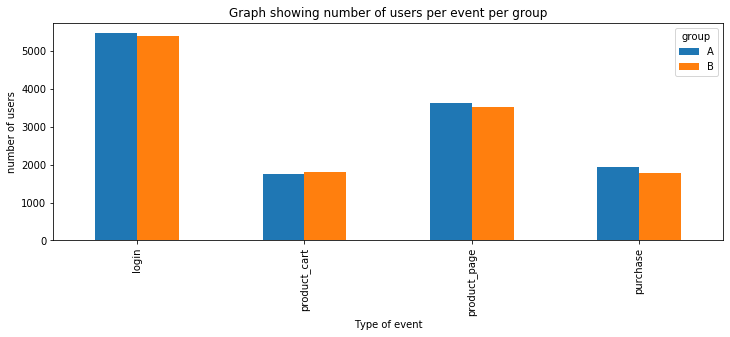

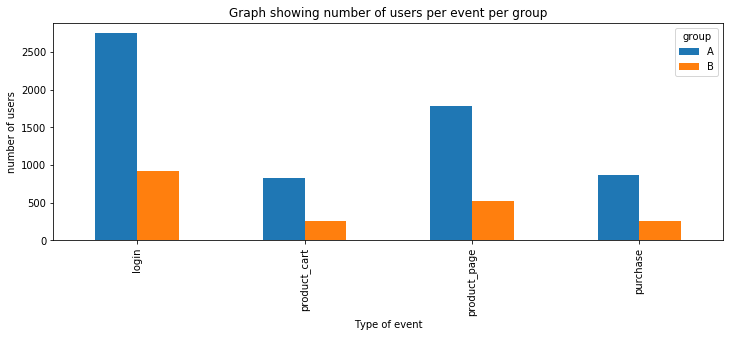

In [45]:
ax = interface_pivot_data.plot(kind='bar',figsize=(12,4))
ax.set_title('Graph showing number of users per event per group')
ax.set_ylabel('number of users')
ax.set_xlabel('Type of event');

ax = recommender_pivot_data.plot(kind='bar',figsize=(12,4))
ax.set_title('Graph showing number of users per event per group')
ax.set_ylabel('number of users')
ax.set_xlabel('Type of event');


Here we can see that in both the test and their corresponding groups 'login' is the most popular event which actually makes sense as users need to login first in order to access the page and make purchases. The product_page is the second popular ones as user needs to browse for their required products, however we might need to look out for things that are responsible for the users who logged in but didn't land on product_page was there any technical error or was the login process was too lengthy to make users tired of using the site.

 Clearly, in both the ab_tests, Group A the control group showed better results at each stage than group B.

### Study conversion at different stages of the funnel.

In [52]:
# making a new table using groupby method to show number of users per event for interface_test
interface_users_count = interface_test_data.groupby('event_name').agg({'user_id': ['nunique']}).sort_values(
                                                                                                by = ('user_id', 'nunique'), 
                                                                                                ascending=False)
interface_users_count.reset_index(inplace=True)
interface_users_count= interface_users_count.reindex(index=[0,1,3,2])

In [53]:
# making a new table using groupby method to show number of users per event for recommender_system_test
recommender_users_count = recommender_test_data.groupby('event_name').agg({'user_id': ['nunique']}).sort_values(by = ('user_id', 'nunique'), 
                                                                                        ascending=False)
recommender_users_count.reset_index(inplace=True)
recommender_users_count = recommender_users_count.reindex(index=[0,1,3,2])

In [54]:
# renaming the column names
interface_users_count.columns = ['event_name','number of users']
recommender_users_count.columns = ['event_name','number of users']

In [55]:
# building a stack funnel plot to represent the number of users for each ab_test  per event


fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'interface_users_count',
    y = interface_users_count['event_name'],
     x =  interface_users_count['number of users'],
                          textinfo = "value + percent previous + percent initial"))

fig.add_trace(go.Funnel(
    name = 'recommender_users_count',
    orientation = "h",
    y = recommender_users_count['event_name'],
    x =  recommender_users_count['number of users'],
    textinfo = "value + percent previous + percent initial"))





From the above graph it is pretty much clear that interface_test has better results in both per stage and overall conversion percentage of users when compared to recommender_user_test dataframe.  

In both the ab_tests we can see that conversion from login stage to landing on product page  stage the conversion percentgae is not more than 66% , we might want to check up what happened to rest of 33% users. We can check factors like what products were they looking for, if found weren't the prices attractive or whether there were extra shipping costs etc. 

Coming to the purchase stage, here we lost almost 50% of our users. We need to check factors like, may be there were some unexpected extra taxes added during payment? or do we need to include some promo codes to attract users to make sure they do their purchase? etc. Surprisingly Product_cart is the final stage in our funnel, this may be because some websites do have a buy in one click option which makes things easier for them to make direct payment without adding items to the cart. 

### Is the number of events per user distributed equally among the samples?

In [56]:
# Checking the average number of events per user for interface_test users of group A

interface_group_A = interface_test_data.query('group == "A"')
interface_events_per_user_A = interface_group_A.groupby('user_id')['event_name'].count().mean()
print('Average number of events per user: {:.0f}'.format(interface_events_per_user_A))

Average number of events per user: 7


In [57]:
# Checking the average number of events per user for interface_test users of group B

interface_group_B = interface_test_data.query('group == "B"')
interface_events_per_user_B = interface_group_B.groupby('user_id')['event_name'].count().mean()
print('Average number of events per user: {:.0f}'.format(interface_events_per_user_B))

Average number of events per user: 7


In [58]:
# Checking the average number of events per user for recommender_system_test users of group A

recommender_group_A = recommender_test_data.query('group == "A"')
recommender_events_per_user_A = recommender_group_A.groupby('user_id')['event_name'].count().mean()
print('Average number of events per user: {:.0f}'.format(recommender_events_per_user_A))

Average number of events per user: 5


In [59]:
# Checking the average number of events per user for recommender_system_test users of group B

recommender_group_B = recommender_test_data.query('group == "B"')
recommender_events_per_user_B = recommender_group_B.groupby('user_id')['event_name'].count().mean()
print('Average number of events per user: {:.0f}'.format(recommender_events_per_user_B))

Average number of events per user: 2


From the above results, we can see that average number of events per user is distributed equally in the two groups of interface_test and not in the recommender_system_test.

In [60]:
# adding a new column to the dataframe representing the day of week
recommender_test_data['day'] = recommender_test_data.event_dt.dt.weekday
recommender_test_data.sample(10)

,user_id,group,ab_test,event_dt,event_name,details,first_date,region,device,day
9780,6460D0D3A5C3CD78,B,recommender_system_test,2020-12-18 08:02:56,product_page,NaN,2020-12-16,EU,Mac,4.0
10716,C3D6CC02662EBBFF,A,recommender_system_test,2020-12-15 00:08:51,product_page,NaN,2020-12-15,EU,PC,1.0
24391,D1292E911948CA98,A,recommender_system_test,2020-12-24 05:20:04,product_cart,NaN,2020-12-16,EU,Android,3.0
349,3B3F68DC5779E517,B,recommender_system_test,2020-12-21 21:14:27,login,NaN,2020-12-08,EU,iPhone,0.0
15360,900BB01307F50F4A,A,recommender_system_test,2020-12-13 23:06:32,login,NaN,2020-12-08,EU,Android,6.0
8739,B3B8EE722563EAC2,A,recommender_system_test,2020-12-14 19:05:50,purchase,4.99,2020-12-14,EU,iPhone,0.0
9143,08589AA89496453B,A,recommender_system_test,2020-12-18 09:35:57,login,NaN,2020-12-17,EU,Android,4.0
465,FB24D74F33FB4839,B,recommender_system_test,2020-12-21 22:05:27,login,NaN,2020-12-21,EU,PC,0.0
9654,1286609CAA081674,B,recommender_system_test,NaT,NaN,NaN,2020-12-10,EU,iPhone,NaN
20074,B6C7A727BF450FAC,A,recommender_system_test,2020-12-20 21:01:34,login,NaN,2020-12-18,EU,PC,6.0


In [61]:
# adding a new column to the dataframe representing the day of week
interface_test_data['day'] = interface_test_data.event_dt.dt.weekday
interface_test_data.sample(10)

,user_id,group,ab_test,event_dt,event_name,details,first_date,region,device,day
11064,7F3DADACDF8F5389,B,interface_eu_test,2020-12-19 20:03:15,login,NaN,2020-12-14,EU,Android,5.0
48637,96F6E23ADBF11576,B,interface_eu_test,2020-12-13 22:08:08,login,NaN,2020-12-11,EU,iPhone,6.0
79126,3223573D25EFE685,A,interface_eu_test,2020-12-07 06:05:13,product_page,NaN,2020-12-07,EU,PC,0.0
60747,960470D44496062F,A,interface_eu_test,2020-12-22 01:01:36,login,NaN,2020-12-17,EU,Mac,1.0
13840,7724BDD576B38A64,B,interface_eu_test,2020-12-15 02:39:06,product_cart,NaN,2020-12-15,EU,Android,1.0
62079,214E14CF5CE53DD1,A,interface_eu_test,2020-12-24 08:37:04,product_page,NaN,2020-12-20,EU,Android,3.0
10151,3E45B9D3156B8711,A,interface_eu_test,2020-12-19 20:02:19,login,NaN,2020-12-16,EU,Android,5.0
36,17B16DFA7D7B5801,A,interface_eu_test,2020-12-08 15:11:56,login,NaN,2020-12-08,EU,Android,1.0
12738,E693F7D38AB29B7E,A,interface_eu_test,2020-12-29 22:02:40,product_page,NaN,2020-12-19,EU,Android,1.0
73214,65067EEDF711859C,B,interface_eu_test,2020-12-26 22:28:53,purchase,4.99,2020-12-07,EU,iPhone,5.0


In [62]:
# calculating number of events taking place on each weekday
interface_events_by_day = interface_test_data.groupby('day').agg({'event_name': ['count']}).sort_values(
                                                                                            by = ('event_name', 'count'), 
                                                                                            ascending=False)
interface_events_by_day.reset_index(inplace=True)

In [63]:
# renaming the columns as per convinience
interface_events_by_day.columns = ['weekday','total_events']

interface_events_by_day

,weekday,total_events
0,0.0,15037
1,1.0,13769
2,2.0,11272
3,6.0,11198
4,5.0,10475
5,3.0,10356
6,4.0,6822


In [64]:
# calculating number of events taking place on each weekday and renaming the columns as per convinience
recommender_events_by_day = recommender_test_data.groupby('day').agg({'event_name': ['count']}).sort_values(
                                                                                                by = ('event_name', 'count'), 
                                                                                                ascending=False)
recommender_events_by_day.reset_index(inplace=True)

recommender_events_by_day.columns = ['weekday','total_events']

recommender_events_by_day

,weekday,total_events
0,0.0,5108
1,1.0,3923
2,2.0,3405
3,3.0,3203
4,5.0,3101
5,6.0,3043
6,4.0,2126


In [65]:
# plotting a plotly bar graph showing number of events per weekday for both the ab_tests
fig = go.Figure(data=[
    go.Bar(name='interface_test', x=interface_events_by_day['weekday'], y=interface_events_by_day.total_events),
    go.Bar(name='recommender_system_test', x=recommender_events_by_day['weekday'], y=recommender_events_by_day.total_events)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title='Number of events distributed among days',
                  yaxis={'title':'Number of events'},
                 xaxis={'title':'Weekday'})

fig.show()


In the graph weekday starts from Monday which is denoted by 0 and is followed by corresponding day for the succeeding numbers like 1 is Tuesday and so on till 6 being Sunday. We see that, for both ab_tests the total number of events taking place is highest on Monday and being least on Fridays. May be people are busy making plans for the weekends :P 

Yet again , the interface_test has better results here than that of recommender_system_test.

### Checking if the condition 15% of the new users from the EU region is satisfied


In [66]:
interface_test_data.region.value_counts()

EU           79646
N.America        0
CIS              0
APAC             0
Name: region, dtype: int64

We see that in both the test there are atleast 15% of new users from EU region

In [67]:
recommender_test_data.region.value_counts()

EU           25544
N.America      908
APAC           252
CIS            231
Name: region, dtype: int64

In [68]:
eu_users_interface = interface_test_data.user_id.nunique() / final_ab_new_users.user_id.nunique()
eu_users_interface

0.18737142209191193

In [70]:
eu_users_recom_test = recommender_test_data.user_id.nunique() / final_ab_new_users.user_id.nunique()
eu_users_recom_test

0.10854810231156756

As we can see that there are about 19% EU users in the inteface_test and almost 11% EU users in recommender_system_test_data. As the experiments demands for 15% EU users we shall now proceed with the interface ab_test.

### Are there any peculiarities in the data that you have to take into account before starting the A/B test?

Based on the above analysis, we conclude that we can consider proceeding further in our analysis with the interface_test rather than recommender_system_test due to the following reasons:

1. There are only 3675 users who made any event out of 6701 test participants in the recommender_system_test but expected number of active users is 6000.
2. Number of users for each ab_test  per event are very less in the recommender_system_test,
3. Interface_test has better results in both per stage and overall conversion percentage of users when compared to recommender_user_test dataframe.
4. Average number of events per user is distributed equally in the two groups of interface_test and not in the recommender_system_test.


### Calculating cummulative revenue for the groups A & B for the interface_test

In [61]:
# calculating the cummulative revenue of both the groups

cumulative_revenue =  interface_test_data.groupby(['event_dt','group']).agg({'details': 'sum'}).reset_index()
cumulative_revenue.columns = ['event_dt','group','revenue']
print(cumulative_revenue.groupby('group').revenue.sum())


group
A    145954.26
B    129659.30
Name: revenue, dtype: float64


Clearly Group 'A' has higher revenue when compared to group 'B'.

### Checking whether users are split equally in both the groups

In [62]:
# calculating number of users in each group
group_A=len(interface_test_data[interface_test_data.group=='A']['user_id'].value_counts())
group_B=len(interface_test_data[interface_test_data.group=='B']['user_id'].value_counts())

total = group_A + group_B 
print('Users in control group A: {:.0f}'.format(group_A/total*100),'%')
print('Users in  group B: {:.0f}'.format(group_B/total*100),'%')

Users in control group A: 50 %
Users in  group B: 50 %


Yes, they're split in groups correctly!

In [63]:
# calculating share of users per event in both the groups A & B
pivot = interface_test_data.pivot_table(index='event_name', values='user_id', columns='group', aggfunc=lambda x: x.nunique())
pivot.reset_index(inplace=True)

In [64]:
pivot_ = pd.crosstab(interface_test_data.event_name,
                     interface_test_data.group,
                     values=interface_test_data.user_id,
                     aggfunc='nunique', normalize='columns')
pivot_

group,A,B
event_name,,
login,0.427298,0.430502
product_cart,0.137273,0.144914
product_page,0.284475,0.282070
purchase,0.150954,0.142514


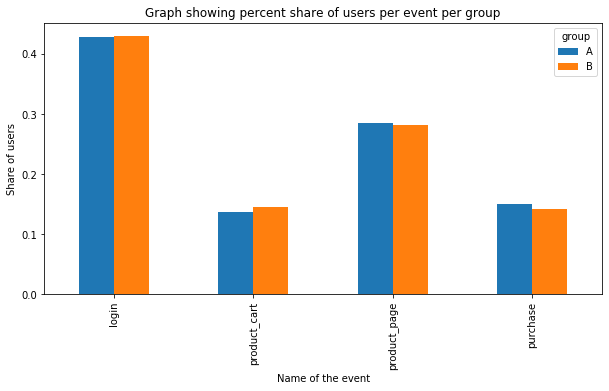

In [65]:
# plotting a bar graph to show percent share of users per event per group
ax = pivot_.plot(kind='bar',figsize=(10,5))
ax.set_title('Graph showing percent share of users per event per group')
ax.set_xlabel('Name of the event')
ax.set_ylabel('Share of users');

We can see that there is less than 0.5% difference between the number of users split into two groups A & B. Therefore, we can happily proceed further with our analysis.

### Use a z-test to check the statistical difference between the proportions.

#### Formulating Hypothesis

Null Hypothesis : H0 - There is no statistical significant difference between the conversions of two groups.

Alternative Hypothesis : H1 - The conversions between the two groups have statistical significant difference

In [66]:
# formulating a function to Check whether the difference between the groups is statistically significant for different events
def check_hypothesis(group1,group2, event, alpha=0.05):
    #let's start with successes, using 
    successes1=pivot[pivot.event_name==event][group1].iloc[0]
    successes2=pivot[pivot.event_name==event][group2].iloc[0]
    
    #for trials we can go back to original df or used a pre-aggregated data
    trials1=interface_test_data[interface_test_data.group==group1]['user_id'].nunique()
    trials2=interface_test_data[interface_test_data.group==group2]['user_id'].nunique()
    
    #proportion for success in the first group
    p1 = successes1/trials1

   #proportion for success in the second group
    p2 = successes2/trials2

    # proportion in a combined dataset
    p_combined = (successes1 + successes2) / (trials1 + trials2)

  
    difference = p1 - p2
    
    
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

  
    distr = st.norm(0, 1) 


    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Reject H0 for",event, 'and groups',group1,group2)
    else:
        print("Fail to Reject H0 for", event,'and groups',group1,group2)  

In [67]:
# writing a for loop to keep the function iterating through the events for groups A & B
for i in pivot.event_name.unique():
    check_hypothesis('A','B', i, alpha=0.05)

p-value:  0.814062888768059
Fail to Reject H0 for login and groups A B
p-value:  0.0859111947332698
Fail to Reject H0 for product_cart and groups A B
p-value:  0.30875632339671144
Fail to Reject H0 for product_page and groups A B
p-value:  0.01826370095380514
Reject H0 for purchase and groups A B


There were total 4 tests conducted and out of them only three samples seems to have no statistical significant difference between the proportions.

Here we can see that, except the 'purchase' event all other events have no statistical significant difference between the proportions. Therefore , we may need to proceed further by using a midifed alpha value which can acquired using the bon ferroni correction factor.

In [68]:
# calculating bon ferroni correction factor 
bon_ferroni_correction = 0.05 / 4
bon_ferroni_correction

0.0125

In [69]:
# writing a for loop to keep the function iterating through the events for groups A & B with modified alpha value
for i in pivot.event_name.unique():
    check_hypothesis('A','B', i, alpha=0.012)

p-value:  0.814062888768059
Fail to Reject H0 for login and groups A B
p-value:  0.0859111947332698
Fail to Reject H0 for product_cart and groups A B
p-value:  0.30875632339671144
Fail to Reject H0 for product_page and groups A B
p-value:  0.01826370095380514
Fail to Reject H0 for purchase and groups A B


There is no statistical significant difference between the conversions of two groups.

# Overall conclusion and recommendations

Testing changes related to the introduction of an improved recommendation system was supposed to lead to show better conversion into product page views,instances of adding items to the shopping cart (product_cart), and purchases (purchase). At each stage of the funnel there was supposed to be at least a 10% increase. Unfortunately, that didn't happen. Therefore, I think spending additional amount, time and effort on improving the recommendation system can be avoided.



Coimng to the analysis part, these are the steps that were carried out:

1. The datatypes were arranged appropriately and missing values in the 'details' column in the final_ab_events dataframe which were about 363447 were present, may be due to the fact that not all users who login and search for products end up making purchases.

2. There were no duplicate values reported in any of the dataframes except for the final_ab_participants dataframe that too specifically in the group and ab_test columns, this may be due to the reason that repeated usrs in group A may be users who belong to both the tests or vice versa so for our further analysis I separated the users based on type of ab_test and no mixed users were found.

3. The 'login' stage is the most popular event which actually makes sense as users need to login first in order to access the page and make purchases. The product_page is the second popular ones as user needs to browse for their required products, however we might need to look out for things that are responsible for the users who logged in but didn't land on product_page was there any technical error or was the login process was too lengthy to make users tired of using the site.

4. The interface_test has better results in both per stage and overall conversion percentage of users when compared to recommender_user_test dataframe. In the 'purchase' stage we lost almost 50% of our users. We need to check factors like, may be there were some unexpected extra taxes added during payment? or do we need to include some promo codes to attract users to make sure they do their purchase? etc. Surprisingly Product_cart is the final stage in our funnel, this may be because some websites do have a buy in one click option which makes things easier for them to make direct payment without adding items to the cart.

5. Total number of events taking place is highest on Monday and being least on Fridays. We came to a conclusion to proceed with the 'interface_test' rather than 'recommender_system' test due to the following reasons:

   a. There are only 3675 users in the recommender_system_test but expected number of test participants is 6000.
   b. Number of users for each ab_test per event are very less in the recommender_system_test,
   c. Interface_test has better results in both per stage and overall conversion percentage of users when compared to   recommender_user_test dataframe.
   d. Average number of events per user is distributed equally in the two groups of interface_test and not in the recommender_system_test.
 
6. There is no statistical significant difference between the conversions of two groups.

Finally, coming to recommendations from my side based on analysis are:

1. May be we can focus more on the purchase stage as we loose almost 50% of our users. We need to check factors like, may be there were some unexpected extra taxes added during payment? or do we need to include some promo codes to attract users to make sure they do their purchase!

2. We can try putting some exciting offers right on top of the login page so that users get attracted to those offers and end up purchasing in order to avail those offer benefits.

3. Modifying the recommendation system might not be an effective option all alone but can still be an add on which involves less time and money.